# QUONTO

* To make sure the company stays profitable, they need to have an average default rate below 8.5%.
* We've gathered data on different loans
* Your goal is to test whether the algorithm respects the maximum default loan rate.

## Step 1 - Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 - Import Dataset

In [ ]:
df = pd.read_csv("./assets/Python/qonto_loans.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE
0,182940,0,Cash loans,F,N,N,0,90000.0,835380.0,23571.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.019689
1,397049,1,Cash loans,M,Y,Y,0,225000.0,254700.0,20250.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018029
2,120845,1,Cash loans,M,Y,Y,3,135000.0,755190.0,38686.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.025164
3,155211,0,Revolving loans,M,N,N,2,180000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007305
4,172542,0,Cash loans,M,N,Y,0,270000.0,781920.0,33129.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007330


## Step 3 - EDA (Exploratory Data Analysis)

In [ ]:
df.describe(include="all")                    # Voir le include="all"

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE
count,10000.000000,10000.000000,10000,10000,10000,10000,10000.000000,1.000000e+04,1.000000e+04,9999.000000,9.997000e+03,9965,10000,10000,10000,10000,10000.000000
unique,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,7,6,5,5,6,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN
freq,NaN,NaN,9073,6642,6610,6884,NaN,NaN,NaN,NaN,NaN,8158,5129,6968,6327,8847,NaN
mean,278434.555600,0.077500,NaN,NaN,NaN,NaN,0.419200,1.677800e+05,6.034761e+05,26909.101710,5.414610e+05,NaN,NaN,NaN,NaN,NaN,0.021051
std,103005.459546,0.267397,NaN,NaN,NaN,NaN,0.747213,9.376608e+04,4.015770e+05,14132.620434,3.679354e+05,NaN,NaN,NaN,NaN,NaN,0.014012
min,100077.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.655000e+04,4.500000e+04,1980.000000,4.500000e+04,NaN,NaN,NaN,NaN,NaN,0.000533
25%,187556.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.762775e+05,16551.000000,2.385000e+05,NaN,NaN,NaN,NaN,NaN,0.010032
50%,279763.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.485000e+05,5.212800e+05,24822.000000,4.500000e+05,NaN,NaN,NaN,NaN,NaN,0.018850
75%,367411.750000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.100000e+05,34049.250000,6.795000e+05,NaN,NaN,NaN,NaN,NaN,0.028663


## Step 4 - Define hypothesises

In [ ]:
H1 = "Le taux de défaut est <  8.5%"
H0 = "Le taux de défaut est >= 8.5 %"

## Step 5 - Calculate Z-score

![Z-score.png](attachment:Z-score.png)

In [ ]:
# Calculate Z-Score
# Z = (X-µ)/s/sqrt(n)

X = df.TARGET.mean()               # Voir la notation df.TARGET au lieu de df["TARGET"]
mu = 8.5 / 100.0
s = df.TARGET.std()
n = len(df) 
Z = (X - mu) / (s / n** 0.5)

# print(Z)
print(f"La valeur de z est : {Z:.3f}")

La valeur de z est : -2.805


## Step 6 - Set $\alpha$

In [ ]:
alpha = 0.05

## Step 7 - Compare p-value to $\alpha$ puis conclure (ou pas)

In [ ]:
from statsmodels.stats.weightstats import ztest

z_score, p_value = ztest(df.TARGET, alternative="smaller", value=mu)
print(f"La p-value calculée avec ztest() est : {p_value:.4f}") 


from scipy.stats import norm
X = norm(mu, (df.TARGET.std() / len(df) ** 0.5))
# # Cumulative Distribution Function (CDF) 
# p_value2 = X.cdf(df.TARGET.mean())  
# print(f"La p-value calculée avec cdf() est   : {p_value:.4f}") 



# Compare p-value to confidence level
# Conclude (ou pas)
if p_value < alpha:
  print("HO est rejetée donc H1 est acceptée")
  print(f"Pour rappel H1 = {H1}")
else:
  print("H0 ne peut pas être rejetée. On ne peut pas conclure")
  print(f"Pour rappel H0 = {H0}")

La p-value calculée avec ztest() est : 0.0025
HO est rejetée donc H1 est acceptée
Pour rappel H1 = Le taux de défaut est <  8.5%


## Step 8 (Optional) - Visualize probability

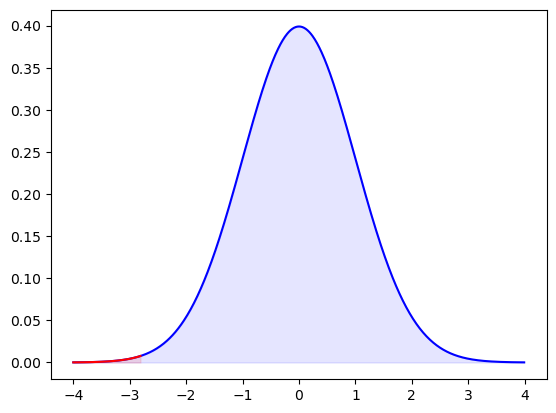

In [ ]:
from scipy.stats import norm

# Génère des valeurs entre -4 et 4 espacées de .01
x_values = np.arange(-4, 4, 0.01)

# Génère les valeurs d'une gaussienne dont la moyenne est à 0 et l'écart type vaut 1 
# pour l'ensemble des x_values
mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)        # pdf = Probability density function 

# Crée une figure et un jeu d'axes
fig, ax = plt.subplots()
# Affiche y en fonction de x
ax.plot(x_values, y_values, color="blue", alpha=1.00)
# Rempli sous la courbe
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

# En fonction du z_score
if z_score < 0:
    # Crée un jeu de x entre -4 et z
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    # ou entre z et 4
    x_values2 = np.arange(z_score, 4, 0.01)

# Génère les valeurs d'une gaussienne dont la moyenne est à 0 et l'écart type vaut 1 
# pour l'ensemble des x_values2
y_values2 = norm.pdf(x_values2, mean_target, std_target)
# Affiche y_values2 en fonction de x_values2
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
# Rempli sous la courbe 
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)